<p><font size="6"><b>Spatial relationships and joins</b></font></p>

In [1]:
from matplotlib import *

from matplotlib import pyplot as plt
import matplotlib.cm as cm

import pandas as pd
import geopandas as gpd

In [81]:
italy_prov = gpd.read_file('../data/georef-italy-provincia/georef-italy-provincia-millesime.shp')
italy_prov = italy_prov.to_crs(epsg=3003)
italy_prov.head()

,year,rip_code,rip_name,reg_code,reg_name,prov_code,prov_name,prov_name_u,prov_name_l,prov_area_c,prov_type,prov_sigla,geometry
0,2022,3,Centro,9,Toscana,53,Grosseto,GROSSETO,grosseto,ITA,Provincia,GR,"MULTIPOLYGON (((1674029.458 4681213.014, 16740..."
1,2022,1,Nord-Ovest,3,Lombardia,18,Pavia,PAVIA,pavia,ITA,Provincia,PV,"MULTIPOLYGON (((1485393.3 4984918.681, 1485289..."
2,2022,5,Isole,20,Sardegna,91,Nuoro,NUORO,nuoro,ITA,Provincia,NU,"MULTIPOLYGON (((1560036.525 4425253.29, 156010..."
3,2022,2,Nord-Est,4,Trentino-Alto Adige,21,Bolzano,BOLZANO,bolzano,ITA,Provincia autonoma,BZ,"POLYGON ((1765985.235 5175481.899, 1765805.528..."
4,2022,2,Nord-Est,5,Veneto,227,Venezia,VENEZIA,venezia,ITA,Citta metropolitana,VE,"POLYGON ((1784616.807 5077528.433, 1784738.032..."


## Spatial relationships

An important aspect of geospatial data is that we can look at *spatial relationships*: how two spatial objects relate to each other (whether they overlap, touch, contain, or are close to one another).

The First Law of Geography, according to Waldo Tobler, is "everything is related to everything else, but near things are more related than distant things."


### Spatial Relationships between objects

Let's first create some small toy spatial objects:

Two polygon <small>(note: we use `.item()` here to to extract the scalar geometry object from the GeoSeries of length 1)</small>:

In [27]:
torino = italy_prov.loc[italy_prov['prov_name'] == 'Torino', 'geometry'].centroid
milano = italy_prov.loc[italy_prov['prov_name'] == 'Milano', 'geometry'].centroid

we can create the centroids of all provinces

In [34]:
italy_prov['centroid'] = italy_prov.centroid

(1263367.6894823099, 2361994.6851407625, 3869344.226223284, 5284646.808183195)

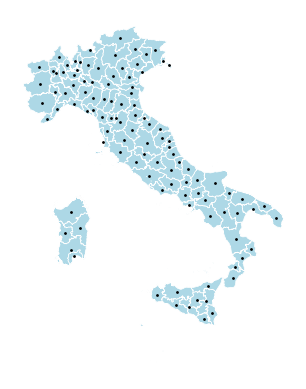

In [51]:
ax=italy_prov.plot( linewidth=.5, edgecolor='w', color='lightblue')
italy_prov['centroid'].plot(color='k',ax=ax, markersize=1)
ax.axis('off')

now we can define the distance among all provinces centroids and calculate the distance matrix  
for this we use the apply lambda function

In [54]:
distance_matrix = italy_prov['centroid'].apply(lambda x: italy_prov['centroid'].distance(x))

# Convert the distance matrix to a GeoDataFrame for easier handling
distance_df = gpd.GeoDataFrame(distance_matrix, columns=italy_prov.index, index=italy_prov.index)
distance_df

,0,1,2,3,4,5,6,7,8,9,...,97,98,99,100,101,102,103,104,105,106
0,0.000000,312826.573740,329051.925328,4.346468e+05,317297.572857,201344.090423,502447.607576,622442.775879,4.040670e+05,398072.884728,...,504956.379848,193516.477768,372084.062448,265404.553772,336118.211174,302496.016832,253070.174115,383178.806511,288122.827791,6.390867e+05
1,312826.573740,0.000000,547836.088062,2.552922e+05,271694.621083,112344.755365,782046.881899,932276.371695,1.485649e+05,277230.041799,...,796114.080175,426538.837405,198422.185237,53206.041017,641615.378375,44764.746607,227765.485649,661548.430856,76310.474759,9.500184e+05
2,329051.925328,547836.088062,0.000000,7.423703e+05,642951.350268,450213.759799,631533.120233,610661.744806,6.806609e+05,717306.500401,...,602947.166273,477389.954555,676363.695977,520745.438170,427979.761261,561042.214837,575943.343679,543672.956745,561809.732680,5.256398e+05
3,434646.796179,255292.240424,742370.303354,0.000000e+00,154935.049755,304398.350392,772301.522970,978782.432360,1.236774e+05,71530.013986,...,803531.522004,434946.293224,66463.635480,246615.920746,692147.537716,216235.759783,191558.487420,663063.757710,197667.536211,1.043613e+06
4,317297.572857,271694.621083,642951.350268,1.549350e+05,0.000000,258006.346000,617817.039614,825125.023296,2.161536e+05,92229.581287,...,648600.555095,282248.860227,125179.127393,233907.922299,540759.967701,227366.272708,68996.801755,508130.615174,195399.170053,8.965919e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,302496.016832,44764.746607,561042.214837,2.162358e+05,227366.272708,112203.021260,755121.054892,915099.619212,1.212289e+05,233627.217640,...,771821.065190,397903.117869,156439.367943,40563.471633,623071.354853,0.000000,186200.387923,635308.640638,32656.141932,9.415771e+05
103,253070.174115,227765.485649,575943.343679,1.915585e+05,68996.801755,194757.201892,601415.682809,793106.784250,2.123401e+05,145461.022704,...,626834.946722,250407.939364,139875.664051,182707.339577,503631.774045,186200.387923,0.000000,486398.635039,153668.865171,8.522853e+05
104,383178.806511,661548.430856,543672.956745,6.630638e+05,508130.615174,562526.835326,120944.153224,328699.489878,6.971451e+05,597241.440685,...,140691.504066,238926.211284,623855.013401,608525.455448,128337.474269,635308.640638,486398.635039,0.000000,609211.866669,4.511534e+05
105,288122.827791,76310.474759,561809.732680,1.976675e+05,195399.170053,112210.458615,728507.568538,894036.473962,1.199579e+05,207341.066472,...,746667.129576,370938.741247,134259.930009,49039.979436,601583.553622,32656.141932,153668.865171,609211.866669,0.000000,9.260791e+05


<div class="alert alert-info" style="font-size:120%">

**REFERENCE**:

Overview of the different functions to check spatial relationships (*spatial predicate functions*):

See https://shapely.readthedocs.io/en/stable/manual.html#predicates-and-relationships for an overview of those methods.

See https://en.wikipedia.org/wiki/DE-9IM for all details on the semantics of those operations.

</div>

---

## Join operation

<div class="alert alert-info" style="font-size:120%">

**JOIN** = *transferring attributes from one layer to another based on their features* <br>

Pandas provides functionality to join or merge dataframes in different ways, see https://chrisalbon.com/python/data_wrangling/pandas_join_merge_dataframe/ for an overview and https://pandas.pydata.org/pandas-docs/stable/merging.html for the full documentation.

Different parts of this operations:

* The GeoDataFrame to which we want add information
* The GeoDataFrame that contains the information we want to add
* The type of join: e.g. left

</div>

In this case, we want to join the `pops` dataframe with the information of the `pop_prov` dataframe, based on the relationship between both datasets.

We use the `geopandas.merge` function to merge provinces ID with their population from two different dataframes

In [82]:
pops = pd.read_csv('../data/id_provinces_it.csv').drop(['Unnamed: 0'],axis=1)
pops.set_index('COD_PROV',inplace=True)

We set the index on the 'COD_PROV' column to the `pops` dataset, indicating a the code of the province. This code is also present in the `populations` dataset, which allows us to merge those two dataframes based on the common column.


In [83]:
pop_prov = pd.read_csv('../data/Popolazione residente.csv')
pop_prov = pop_prov[['Codice provincia','Totale']]
pop_prov.set_index('Codice provincia', inplace=True)

In [84]:
populations = pops.merge(pop_prov, how='left', left_on='COD_PROV', right_on='Codice provincia')
populations.head()


,SIGLA,DEN_PCM,Totale
0,TO,Torino,2207873
1,VC,Vercelli,165878
2,NO,Novara,364478
3,CN,Cuneo,581676
4,AT,Asti,207310


now we merge this into the geo dataframe with the geometry information, using the "sigla" (short name) column

In [85]:
italy = italy_prov.merge(populations, how='left', left_on='prov_sigla', right_on='SIGLA')
italy = italy.rename(columns={'Totale':'population'})
italy.head()

,year,rip_code,rip_name,reg_code,reg_name,prov_code,prov_name,prov_name_u,prov_name_l,prov_area_c,prov_type,prov_sigla,geometry,SIGLA,DEN_PCM,population
0,2022,3,Centro,9,Toscana,53,Grosseto,GROSSETO,grosseto,ITA,Provincia,GR,"MULTIPOLYGON (((1674029.458 4681213.014, 16740...",GR,Grosseto,215328.0
1,2022,1,Nord-Ovest,3,Lombardia,18,Pavia,PAVIA,pavia,ITA,Provincia,PV,"MULTIPOLYGON (((1485393.3 4984918.681, 1485289...",PV,Pavia,542082.0
2,2022,5,Isole,20,Sardegna,91,Nuoro,NUORO,nuoro,ITA,Provincia,NU,"MULTIPOLYGON (((1560036.525 4425253.29, 156010...",NU,Nuoro,195437.0
3,2022,2,Nord-Est,4,Trentino-Alto Adige,21,Bolzano,BOLZANO,bolzano,ITA,Provincia autonoma,BZ,"POLYGON ((1765985.235 5175481.899, 1765805.528...",BZ,Bolzano,539386.0
4,2022,2,Nord-Est,5,Veneto,227,Venezia,VENEZIA,venezia,ITA,Citta metropolitana,VE,"POLYGON ((1784616.807 5077528.433, 1784738.032...",VE,Venezia,833934.0


we can plot the `italy` dataset   
this operation allowed us to add information to the geo dataset and plot the map using the population information we just added   
this can be done with any type of information, epidemiological, environmental, being it count data or rates, etc

(1263367.6894823099, 2361994.6851407625, 3869344.226223284, 5284646.808183195)

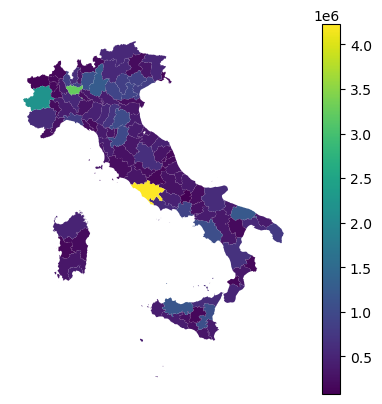

In [80]:
italy.plot(column='population', legend=True)
plt.axis('off')

## Spatial join operation

<div class="alert alert-info" style="font-size:120%">

**SPATIAL JOIN** = *transferring attributes from one layer to another based on their spatial relationship* <br>

Different parts of this operations:

* The GeoDataFrame to which we want add information
* The GeoDataFrame that contains the information we want to add
* The type of join: e.g. left

see reference https://geopandas.org/en/stable/docs/reference/api/geopandas.sjoin.html   
</div>